### Example 2.3 (Asymptotics of Surjections)
Asymptotic investigation of surjections from their exponential generating function.  
*Requirements: Internet access (partially)*

In [1]:
# First, define z as a variable
var('z')

# Next, define the (exponential) generating function
F = 1/(2-exp(z))
show("F(z) = ",F)

'F(z) = ' -1/(e^z - 2)

In [2]:
# The coefficients of the power series expansion of C at the origin form the number of surjections divided by n!
# Here we recover the number of surjections
ser = F.series(z,20).list()
surj = [ser[k]*factorial(k) for k in range(20)]
print(surj)

[1, 1, 3, 13, 75, 541, 4683, 47293, 545835, 7087261, 102247563, 1622632573, 28091567595, 526858348381, 10641342970443, 230283190977853, 5315654681981355, 130370767029135901, 3385534663256845323, 92801587319328411133]


In [3]:
# Search the OEIS (oeis.org) for the sequence
# This requires internet access
oe = oeis(surj)
print(oe)

0: A000670: Fubini numbers: number of preferential arrangements of n labeled elements; or number of weak orders on n labeled elements; or number of ordered partitions of [n].


In [4]:
# Here are a few of the formulas available on the OEIS
oe[0].formulas()[1:5]

0: E.g.f.: 1/(2-exp(x)).
1: a(n) = Sum_{k=1..n} binomial(n, k)*a(n-k), a(0) = 1.
2: The e.g.f. y(x) satisfies y' = 2*y^2 - y.
3: a(n) = A052856(n) - 1, if n>0.

In [5]:
# Here are a few of the examples listed on the OEIS
oe[0].comments()[1:5]

0: Also number of asymmetric generalized weak orders on n points.
1: Also called the ordered Bell numbers.
2: A weak order is a relation that is transitive and complete.
3: Called Fubini numbers by Comtet: counts formulas in Fubini theorem when switching the order of summation in multiple sums. - _Olivier Gérard_, Sep 30 2002

In [6]:
# The residue of F at the dominant singularity z=log(2) is -1/2
show("F(z) = ", F.series(z==log(2),2))

'F(z) = ' (-1/2)*(z - log(2))^(-1) + 1/4 + (-1/24)*(z - log(2)) + Order((z - log(2))^2)

In [7]:
# Because this is a simple pole, we get the asymptotic approximation
var('n')
asm = factorial(n)/2/log(2)^(n+1)
show(LatexExpr(r"s_n\sim"),asm)

s_n\sim 1/2*factorial(n)/log(2)^(n + 1)

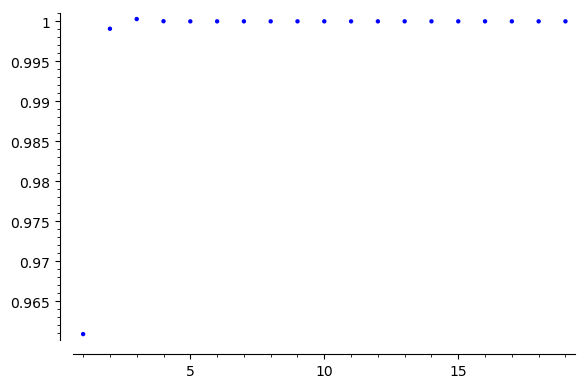

In [8]:
# Plot the ratio of the series coefficients to our asymptotic approximation
# A simple pole implies exponentially decreasing error, and we observe fast convergence
lst = [ser[k]*2*log(2)^(k+1) for k in range(20)]
points([[k,lst[k]] for k in range(1,20)])